In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from src.results import get_best_scores_table, get_scores_skills_table, get_final_scores_skills_table

In [2]:
ens_method = "rand_init"
ens_method_ls = [
    "rand_init",
    "bagging",
    "batchensemble",
    "bayesian",
    "mc_dropout",
    "variational_dropout",
    "concrete_dropout",
]
ens_method_labels = {
    "rand_init": "Naive",
    "bagging": "Bagging",
    "batchensemble": "BatchEns.",
    "bayesian": "Bayesian",
    "mc_dropout": "MC D.",
    "variational_dropout": "Var. D.",
    "concrete_dropout": "Conc. D.",
}
dataset_ls = [
    "boston",
    "concrete",
    "energy",
    "kin8nm",
    "naval",
    "power",
    "protein",
    "wine",
    "yacht",
]
dataset_labels = {
    "boston": "Boston Housing \n (N=506)",
    "concrete": "Concrete Strength \n (N=1030)",
    "energy": "Energy Efficiency \n (N=768)",
    "kin8nm": "Kin8nm \n (N=8192)",
    "naval": "Naval Propulsion \n (N=11934)",
    "power": "Power Plant \n (N=9568)",
    "protein": "Protein Structure \n (N=45730)",
    "wine": "Red Wine Quality \n (N=1599)",
    "yacht": "Yacht Hydrodynamics \n (N=308)"
}
agg_labels = {
    "lp": r"$LP$",
    "vi": r"$V_0^=$",
    "vi-a": r"$V_a^=$",
    "vi-w": r"$V_0^w$",
    "vi-aw": r"$V_a^w$",
}

In [3]:
# Get colors
agg_cols = sns.color_palette("Dark2", 8, as_cmap=True)
# Colors of aggregation methods
agg_col = {
    "lp": agg_cols.colors[4],  # type: ignore
    "vi": agg_cols.colors[5],  # type: ignore
    "vi-a": agg_cols.colors[2],  # type: ignore
    "vi-w": agg_cols.colors[0],  # type: ignore
    "vi-aw": agg_cols.colors[3],  # type: ignore
    "ens": agg_cols.colors[7],  # type: ignore
    "opt": agg_cols.colors[1],  # type: ignore
}

greens = sns.color_palette("Greens", 2, as_cmap=False)
blues = sns.color_palette("Blues", 1)
purples = sns.color_palette("Purples", 1)
reds = sns.color_palette("Reds", 3)
ens_col = {
    "rand_init": greens[1], #multi_model_cols.colors[0],  # type: ignore
    "bagging": greens[0], #multi_model_cols.colors[1],  # type: ignore
    "batchensemble": blues[0], #multi_model_cols.colors[3],  # type: ignore
    "bayesian": purples[0], #multi_model_cols.colors[8],  # type: ignore
    "mc_dropout": reds[2], #dropout_cols.colors[14],  # type: ignore
    "variational_dropout": reds[1], #dropout_cols.colors[16],  # type: ignore
    "concrete_dropout": reds[0], #dropout_cols.colors[15],  # type: ignore
}

# KIT colors
kit_cols_dict = {
    "green": "#00876C",
    "blue": "#4664AA",
    "black": "#000000",
    "grey": "#404040",
}

In [4]:
score_vec = ["crps", "crpss", "me", "lgt", "cov", "a", "w"]
distr_ls = ["drn", "bqn"]
distr_ls = ["norm", "0tnorm"]
n_ens_vec = np.arange(start=2, stop=20 + 2, step=2)
agg_meths = ["lp", "vi", "vi-a", "vi-w", "vi-aw"]

In [6]:
data_path_normal = os.path.join("..", "..", "04_Experiments", "Normal_final")
data_path_trunc = os.path.join("..", "..", "04_Experiments", "t_Normal_final")
data_path_0trunc = os.path.join("..", "..", "04_Experiments", "0t_Normal_final")

In [7]:
# Get all skills table
df_scores_norm, df_skills_norm = get_scores_skills_table(data_path_normal, dataset_ls, score_vec, distr_ls, n_ens_vec, agg_meths, ens_method_ls)  # type: ignore

dataset_ls_tnorm = [
    "naval",
    "wine",
]
df_scores_tnorm, df_skills_tnorm = get_scores_skills_table(data_path_trunc, dataset_ls_tnorm, score_vec, distr_ls, n_ens_vec, agg_meths, ens_method_ls)  # type: ignore

df_scores_0tnorm, df_skills_0tnorm = get_scores_skills_table(data_path_0trunc, dataset_ls, score_vec, distr_ls, n_ens_vec, agg_meths, ens_method_ls)  # type: ignore

df_scores_norm["distr"] = "norm"
df_skills_norm["distr"] = "norm"
df_scores_tnorm["distr"] = "tnorm"
df_skills_tnorm["distr"] = "tnorm"
df_scores_0tnorm["distr"] = "0tnorm"
df_skills_0tnorm["distr"] = "0tnorm"

In [8]:
df_scores = pd.concat([df_scores_norm, df_scores_tnorm, df_scores_0tnorm], ignore_index=True)
df_skills = pd.concat([df_skills_norm, df_skills_tnorm, df_skills_0tnorm], ignore_index=True)

In [5]:
drn_choice = {
    "scen_1": "norm",
    "scen_4": "norm",
    'boston': '0tnorm',
    'concrete': '0tnorm',
    'energy': '0tnorm',
    'kin8nm': '0tnorm',
    'naval': '0tnorm',
    'power': 'norm',
    'protein': 'norm',
    'wine': 'tnorm',
    'yacht': '0tnorm',
}

bqn_choice = {
    "scen_1": "norm",
    "scen_4": "norm",
    'boston': '0tnorm',
    'concrete': '0tnorm',
    'energy': '0tnorm',
    'kin8nm': '0tnorm',
    'naval': '0tnorm',
    'power': 'norm',
    'protein': 'norm',
    'wine': 'tnorm',
    'yacht': '0tnorm',
}

paths = {
    "norm": os.path.join("..", "..", "04_Experiments", "Normal_final"),
    "tnorm": os.path.join("..", "..", "04_Experiments", "t_Normal_final"),
    "0tnorm": os.path.join("..", "..", "04_Experiments", "0t_Normal_final"),    
}

df_scores_final, df_skills_final = get_final_scores_skills_table(paths = paths, drn_choice=drn_choice, bqn_choice=bqn_choice, dataset_ls=dataset_ls, ens_method_ls=ens_method_ls)

In [41]:
df = df_scores_final

df[(df["dataset"] == "power") & (df["ens_method"].isin(["concrete_dropout"])) & (df["agg"] != "ens") & (df["nn"] == "bqn")]["score_20"].mean()


2.4428233212578547

In [38]:
# DRN
print(f"MC Dropout vs. Naive/Bagging: {(4.582123072793784 / 2.5140884452227703 -1) *100 :.4f}")
print(f"Concrete Dropout vs. Naive/Bagging: {(2.4108759761423793 / 2.5140884452227703 -1) *100 :.4f}")
print(f"Concrete vs. MC Dropout: {(2.4108759761423793 / 4.582123072793784 -1) *100 :.4f}")

MC Dropout vs. Naive/Bagging: 82.2578
Concrete Dropout vs. Naive/Bagging: -4.1054
Concrete vs. MC Dropout: -47.3852


In [42]:
# BQN
print(f"MC Dropout vs. Naive/Bagging: {(10.348110279901231 / 2.4052984177634555 -1) *100 :.4f}")
print(f"Concrete Dropout vs. Naive/Bagging: {(2.4428233212578547 / 2.4052984177634555 -1) *100 :.4f}")
print(f"Concrete vs. MC Dropout: {(2.4428233212578547 / 10.348110279901231 -1) *100 :.4f}")

MC Dropout vs. Naive/Bagging: 330.2215
Concrete Dropout vs. Naive/Bagging: 1.5601
Concrete vs. MC Dropout: -76.3935


In [10]:
df = df_scores_final

temp = list(df[(df["dataset"] == "scen_1") & (df["ens_method"] != "variational_dropout")].sort_values(["ens_method", "score_20"], ascending=True).groupby(["ens_method", "nn"]).head(1)["score_20"])
# df[(df["dataset"] == "scen_4") & (df["ens_method"] != "variational_dropout") & (df["nn"] == "drn")].sort_values("score_20").groupby(["ens_method"]).head(1)

print(temp)
change = []
for i in range(0,len(temp),2):
    change.append((temp[i+1] / temp[i] - 1) * 100)


print(np.mean(change))

[0.990471999338151, 0.9975980360549853, 1.0051189400149898, 1.0269403657175236, 0.9890055036809574, 1.00876656544688, 0.9972831119583445, 1.004965719542097, 1.000339620895104, 1.0170338567683896, 0.9903543686592021, 0.9970014266637526]
1.3331586924938115


ValueError: not enough values to unpack (expected 3, got 2)

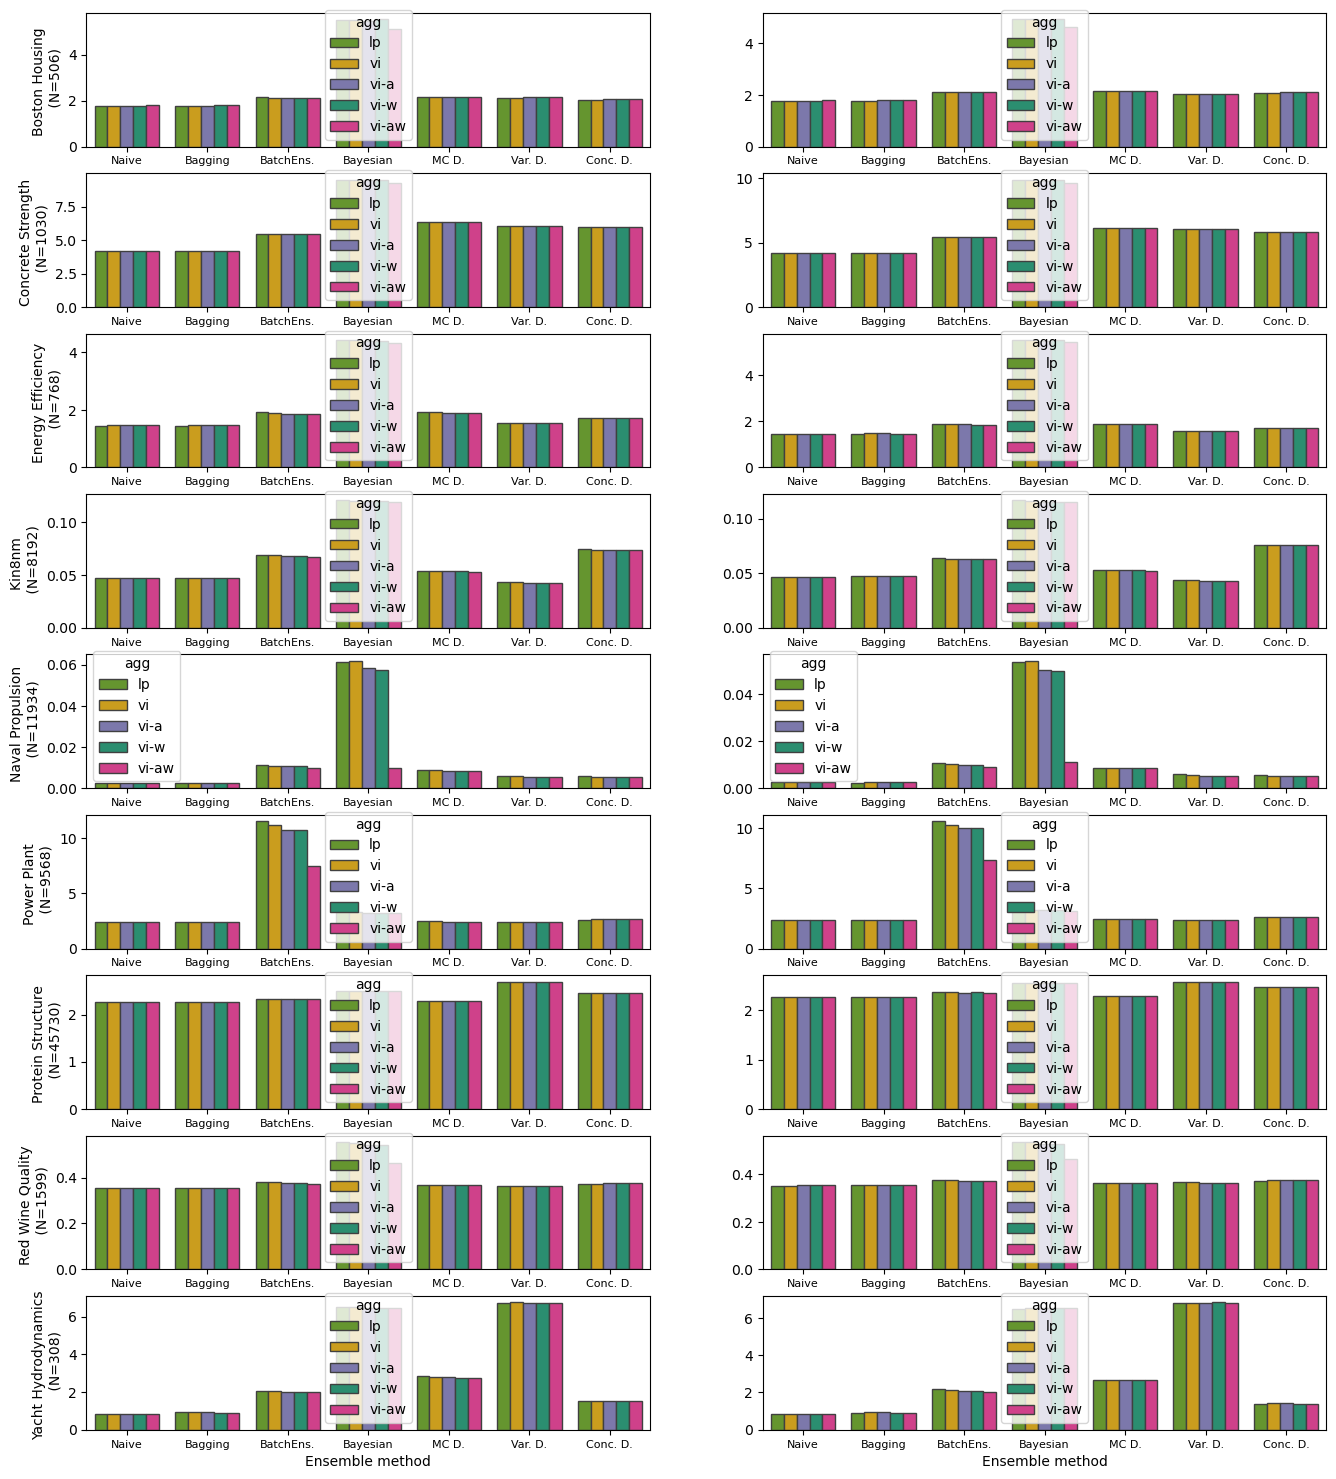

In [16]:
##### Relative score - Barplot - x=ensemble_method #####

# Create subplots
fig, axs = plt.subplots(nrows=len(dataset_ls), ncols=len(distr_ls), figsize=(16,16*1.15), squeeze=False)

# Filter out ensemble mean
df_no_ens = df_temp[df_temp["agg"] != "ens"]

# Iterate over distr types and datasets
for i_distr, distr in enumerate(distr_ls):
    # df_distr = pd.melt(df_scores[i_distr].reset_index(), id_vars="dataset", var_name="ens_method", value_vars=tables_rel[i_distr].columns, value_name="score")
    df_distr = df_no_ens[df_no_ens["distr"] == distr]
    for i_dataset, dataset in enumerate(dataset_ls):
        df_distr_dataset = df_distr[df_distr["dataset"] == dataset]
        
        # Get best score for dataset
        # best_score = best_scores[best_scores["dataset"] == dataset]["score_20"].iloc[0]
        
        if (distr=="tnorm") & (dataset not in dataset_ls_tnorm):
            # axs[i_dataset][i_distr].axhline(best_score, linestyle="--", color=kit_cols_dict["black"])
            axs[i_dataset][i_distr].tick_params(axis="both", which="both", left=False, labelleft=False, bottom=False, labelbottom=False)
            continue
        # Plot boxplots
        g = sns.barplot(data=df_distr_dataset, x="ens_method", y="score_10", hue="agg", ax=axs[i_dataset][i_distr], palette=agg_col, edgecolor=kit_cols_dict["grey"])
        
        # Add 0 line
        # g.axhline(best_score, linestyle="--", color="black")
        # Add labels to x and y axis
        axs[i_dataset][i_distr].set_ylabel("")
        axs[i_dataset][0].set_ylabel(dataset_labels[dataset])
        axs[i_dataset][i_distr].set_xticklabels([ens_method_labels.get(column_name) for column_name in ens_method_ls], fontsize=8)
        axs[i_dataset][i_distr].set_xlabel("")
        axs[len(dataset_ls)-1][i_distr].set_xlabel("Ensemble method")
        

# Set y axis range
upper_limit = np.Inf
# Set y axis range
for ax_norm, ax_0tnorm, ax_tnorm in axs:
    norm_l, norm_u = ax_norm.get_ylim()
    t0norm_l, t0norm_u = ax_0tnorm.get_ylim()
    tnorm_l, tnorm_u = ax_tnorm.get_ylim()
    
    ax_norm.set_ylim(0, min(upper_limit, max(norm_u, t0norm_u, tnorm_u)))
    ax_0tnorm.set_ylim(0, min(upper_limit, max(norm_u, t0norm_u, tnorm_u)))
    ax_tnorm.set_ylim(0, min(upper_limit, max(norm_u, t0norm_u, tnorm_u)))
    

# Merge subplot legends and displaz figure legend
handles = []
labels = []
for ax in [item for sublist in axs for item in sublist]:
    curr_handles, curr_labels = ax.get_legend_handles_labels()
    for idx, check_label in enumerate(curr_labels):
        if check_label not in labels:
            handles.append(curr_handles[idx])
            labels.append(curr_labels[idx])
    ax.legend([],[], frameon=False)
axhline = matplotlib.lines.Line2D([0], [0], linestyle="dashed", color=kit_cols_dict["black"])  # type: ignore
handles.append(axhline)
labels = [agg_labels.get(agg) for agg in labels]
labels.append("Best score per dataset")

# Set titles and legends
axs[0][0].set_title("Normal")
axs[0][1].set_title("0-truncated Normal")
axs[0][2].set_title("Upper-lower truncated Normal")
fig.subplots_adjust(top=0.84)
fig.legend(handles, labels, bbox_to_anchor=(0.9, 0.883), ncol=len(agg_meths)+1)
fig.suptitle(f"CRPS values of maximal ensemble size \n (Lower is better)", y=0.9)

# Save figure
# if export:
#     filename=os.path.join(save_dir, "06_scores.pdf")
#     fig.savefig(filename, bbox_inches='tight')
#     filename=os.path.join(save_dir, "06_scores.png")
#     fig.savefig(filename, bbox_inches='tight')

In [24]:
df_temp = df_scores[(df_scores["nn"] == "drn") & (df_scores["agg"] != "ens")].sort_values(["dataset", "score_10"], ascending=True).groupby("dataset").head(1)
best_distr_choice = dict(zip(df_temp["dataset"], df_temp["distr"]))
best_distr_choice

{'boston': '0tnorm',
 'concrete': '0tnorm',
 'energy': '0tnorm',
 'kin8nm': 'norm',
 'naval': 'tnorm',
 'power': '0tnorm',
 'protein': 'norm',
 'wine': 'tnorm',
 'yacht': '0tnorm'}

In [43]:
df_scores[(df_scores["nn"] == "drn") & (df_scores["dataset"] == "yacht") & (df_scores["distr"] == "0tnorm")].sort_values("score_20", ascending=True)

,ens_method,dataset,nn,agg,score_2,score_4,score_6,score_8,score_10,score_12,score_14,score_16,score_18,score_20,avg_score,distr
1236,batchensemble,yacht,drn,lp,2.248543,2.238021,2.193380,2.163160,2.141395,2.153397,2.157492,2.160959,2.155597,2.177496,2.178944,0tnorm
1240,batchensemble,yacht,drn,vi-aw,2.295367,2.310991,2.303777,2.277704,2.259540,2.259037,2.281322,2.292207,2.297910,2.301419,2.287927,0tnorm
1239,batchensemble,yacht,drn,vi-w,2.315404,2.341217,2.328144,2.298481,2.275762,2.277419,2.297576,2.309711,2.315553,2.321110,2.308038,0tnorm
1241,batchensemble,yacht,drn,ens,2.358530,2.329971,2.308912,2.289843,2.296337,2.297346,2.309610,2.308179,2.318745,2.323441,2.314091,0tnorm
1238,batchensemble,yacht,drn,vi-a,2.289691,2.333512,2.325797,2.296690,2.282013,2.280283,2.305711,2.315485,2.320314,2.326438,2.307593,0tnorm
1237,batchensemble,yacht,drn,vi,2.315130,2.374318,2.361076,2.328748,2.313804,2.311349,2.336481,2.346111,2.351216,2.358215,2.339645,0tnorm
1024,rand_init,yacht,drn,vi-aw,2.471233,2.461166,2.462798,2.464855,2.453118,2.457058,2.452227,2.448343,2.449763,2.442175,2.456274,0tnorm
1022,rand_init,yacht,drn,vi-a,2.478014,2.470589,2.471361,2.465151,2.459964,2.455984,2.459257,2.453230,2.451621,2.444845,2.461002,0tnorm
1132,bagging,yacht,drn,vi-aw,2.524290,2.467740,2.459961,2.453728,2.432730,2.442813,2.449968,2.433273,2.431019,2.470244,2.456577,0tnorm
1020,rand_init,yacht,drn,lp,2.504297,2.476702,2.468796,2.479676,2.468876,2.467197,2.474553,2.464139,2.464742,2.474522,2.474350,0tnorm


In [25]:
df_temp

,ens_method,dataset,nn,agg,score_2,score_4,score_6,score_8,score_10,score_12,score_14,score_16,score_18,score_20,avg_score,distr
924,rand_init,boston,drn,lp,1.907430,1.879391,1.877296,1.881636,1.877558,1.872875,1.872831,1.869919,1.873890,1.871402,1.878423,0tnorm
936,rand_init,concrete,drn,lp,5.869093,5.862004,5.858400,5.871978,5.884000,5.866473,5.872059,5.872868,5.886742,5.879037,5.872265,0tnorm
1056,bagging,energy,drn,lp,1.587036,1.569635,1.552566,1.555044,1.552743,1.546426,1.546407,1.547163,1.543639,1.543084,1.554374,0tnorm
688,concrete_dropout,kin8nm,drn,vi-aw,0.046316,0.046317,0.046312,0.046312,0.046308,0.046305,0.046308,0.046308,0.046308,0.046307,0.046310,norm
758,rand_init,naval,drn,vi-a,-0.475449,-0.282427,-2.270881,0.008518,-1.776924,0.008518,-0.956704,-1.487247,-2.571654,-1.593578,-1.139783,tnorm
1312,bayesian,power,drn,vi-aw,2.396323,2.396468,2.396598,2.396342,2.396365,2.397172,2.396635,2.396315,2.396293,2.396242,2.396475,0tnorm
724,concrete_dropout,protein,drn,vi-aw,2.386029,2.386019,2.386037,2.386047,2.386039,2.386043,2.386040,2.386033,2.386039,2.386037,2.386036,norm
769,rand_init,wine,drn,vi,0.354487,0.353140,0.352989,0.352911,0.352826,0.352862,0.352781,0.352817,0.352770,0.365217,0.354280,tnorm
1236,batchensemble,yacht,drn,lp,2.248543,2.238021,2.193380,2.163160,2.141395,2.153397,2.157492,2.160959,2.155597,2.177496,2.178944,0tnorm


In [26]:
df_temp2 = df_scores.copy()
for idx, row in df_temp2.iterrows():
    if row["nn"] == "drn":
        is_distr = row["distr"]
        should_distr = best_distr_choice[row["dataset"]]
        is_dataset = row["dataset"]
        if row["distr"] == best_distr_choice[row["dataset"]]:
            continue
        else:
            print(f"Drop ({idx} - {is_distr}) as {is_dataset} is not {should_distr}")
            df_temp2.drop(labels=idx, axis=0, inplace=True)
    else:
        if row["distr"] != "norm":
            print("Drop bqn row")
            df_temp2.drop(labels=idx, axis=0, inplace=True)
df_temp2

Drop (0 - norm) as boston is not 0tnorm
Drop (1 - norm) as boston is not 0tnorm
Drop (2 - norm) as boston is not 0tnorm
Drop (3 - norm) as boston is not 0tnorm
Drop (4 - norm) as boston is not 0tnorm
Drop (5 - norm) as boston is not 0tnorm
Drop (12 - norm) as concrete is not 0tnorm
Drop (13 - norm) as concrete is not 0tnorm
Drop (14 - norm) as concrete is not 0tnorm
Drop (15 - norm) as concrete is not 0tnorm
Drop (16 - norm) as concrete is not 0tnorm
Drop (17 - norm) as concrete is not 0tnorm
Drop (24 - norm) as energy is not 0tnorm
Drop (25 - norm) as energy is not 0tnorm
Drop (26 - norm) as energy is not 0tnorm
Drop (27 - norm) as energy is not 0tnorm
Drop (28 - norm) as energy is not 0tnorm
Drop (29 - norm) as energy is not 0tnorm
Drop (48 - norm) as naval is not tnorm
Drop (49 - norm) as naval is not tnorm
Drop (50 - norm) as naval is not tnorm
Drop (51 - norm) as naval is not tnorm
Drop (52 - norm) as naval is not tnorm
Drop (53 - norm) as naval is not tnorm
Drop (60 - norm) as po

,ens_method,dataset,nn,agg,score_2,score_4,score_6,score_8,score_10,score_12,score_14,score_16,score_18,score_20,avg_score,distr
6,rand_init,boston,bqn,lp,1.782729,1.772582,1.774840,1.770881,1.766817,1.773018,1.767368,1.762707,1.768901,1.766350,1.770619,norm
7,rand_init,boston,bqn,vi,1.778156,1.775102,1.772153,1.770237,1.769859,1.769370,1.767799,1.765401,1.766263,1.765426,1.769976,norm
8,rand_init,boston,bqn,vi-a,1.791120,1.790186,1.787647,1.785503,1.784640,1.783739,1.782497,1.780062,1.780661,1.779696,1.784575,norm
9,rand_init,boston,bqn,vi-w,1.791600,1.790748,1.788779,1.787073,1.786082,1.785092,1.783817,1.781635,1.781903,1.780717,1.785744,norm
10,rand_init,boston,bqn,vi-aw,1.797270,1.796266,1.793910,1.791413,1.790566,1.790326,1.788733,1.786474,1.787249,1.786082,1.790829,norm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1669,concrete_dropout,yacht,drn,vi,3.241650,3.245488,3.240018,3.238477,3.238514,3.239313,3.239255,3.239523,3.239694,3.239903,3.240184,0tnorm
1670,concrete_dropout,yacht,drn,vi-a,3.216575,3.220365,3.214887,3.213070,3.213520,3.214083,3.213523,3.213478,3.213399,3.213449,3.214635,0tnorm
1671,concrete_dropout,yacht,drn,vi-w,3.165281,3.169278,3.163866,3.162538,3.162232,3.162633,3.162361,3.162672,3.163331,3.162899,3.163709,0tnorm
1672,concrete_dropout,yacht,drn,vi-aw,2.828650,2.836959,2.840650,2.830458,2.828273,2.826057,2.846862,2.833349,2.854753,2.873345,2.839936,0tnorm


In [27]:
for goupname, group in df_temp2.groupby("dataset"):
    print(group["dataset"].unique())
    print(group["distr"].unique())
    print()

['boston']
['norm' '0tnorm']

['concrete']
['norm' '0tnorm']

['energy']
['norm' '0tnorm']

['kin8nm']
['norm']

['naval']
['norm' 'tnorm']

['power']
['norm' '0tnorm']

['protein']
['norm']

['wine']
['norm' 'tnorm']

['yacht']
['norm' '0tnorm']



In [13]:
n_dataset = 9
n_nn = 2
n_agg = 6
n_ens_method = 7
print(n_dataset*n_nn*n_agg*n_ens_method)

756


In [14]:
df_temp2["agg"].unique()

array(['lp', 'vi', 'vi-a', 'vi-w', 'vi-aw', 'ens'], dtype=object)

In [15]:
score_vec = ["crps", "crpss", "me", "lgt", "cov", "a", "w"]
nn_vec = ["drn", "bqn"]
n_ens_vec = np.arange(start=2, stop=10 + 2, step=2)
agg_meths = ["lp", "vi", "vi-a", "vi-w", "vi-aw"]
show_outliers=False

In [16]:
ens_method = "rand_init"
ens_method_ls = [
    "rand_init",
    "bagging",
    "batchensemble",
    "bayesian",
    "mc_dropout",
    "variational_dropout",
    "concrete_dropout",
]
ens_method_labels = {
    "rand_init": "Naive",
    "bagging": "Bagging",
    "batchensemble": "BatchEns.",
    "bayesian": "Bayesian",
    "mc_dropout": "MC Dropout",
    "variational_dropout": "Var. Drop.",
    "concrete_dropout": "Conc. Drop.",
}
dataset_ls = [
    "boston",
    "concrete",
    "energy",
    "kin8nm",
    "naval",
    "power",
    "protein",
    "wine",
    "yacht",
]
dataset_labels = {
    "boston": "Boston Housing \n (N=506)",
    "concrete": "Concrete Strength \n (N=1030)",
    "energy": "Energy Efficiency \n (N=768)",
    "kin8nm": "Kin8nm \n (N=8192)",
    "naval": "Naval Propulsion \n (N=11934)",
    "power": "Power Plant \n (N=9568)",
    "protein": "Protein Structure \n (N=45730)",
    "wine": "Wine Quality Red \n (N=1599)",
    "yacht": "Yacht Hydrodynamics \n (N=308)"
}
agg_labels = {
    "lp": r"$LP$",
    "vi": r"$V_0^=$",
    "vi-a": r"$V_a^=$",
    "vi-w": r"$V_0^w$",
    "vi-aw": r"$V_a^w$",
}

In [17]:
# Get colors
agg_cols = sns.color_palette("Dark2", 8, as_cmap=True)
# Colors of aggregation methods
agg_col = {
    "lp": agg_cols.colors[4],  # type: ignore
    "vi": agg_cols.colors[5],  # type: ignore
    "vi-a": agg_cols.colors[2],  # type: ignore
    "vi-w": agg_cols.colors[0],  # type: ignore
    "vi-aw": agg_cols.colors[3],  # type: ignore
    "ens": agg_cols.colors[7],  # type: ignore
    "opt": agg_cols.colors[1],  # type: ignore
}

greens = sns.color_palette("Greens", 2, as_cmap=False)
blues = sns.color_palette("Blues", 1)
purples = sns.color_palette("Purples", 1)
reds = sns.color_palette("Reds", 3)
ens_col = {
    "rand_init": greens[1], #multi_model_cols.colors[0],  # type: ignore
    "bagging": greens[0], #multi_model_cols.colors[1],  # type: ignore
    "batchensemble": blues[0], #multi_model_cols.colors[3],  # type: ignore
    "bayesian": purples[0], #multi_model_cols.colors[8],  # type: ignore
    "mc_dropout": reds[2], #dropout_cols.colors[14],  # type: ignore
    "variational_dropout": reds[1], #dropout_cols.colors[16],  # type: ignore
    "concrete_dropout": reds[0], #dropout_cols.colors[15],  # type: ignore
}

# KIT colors
kit_cols_dict = {
    "green": "#00876C",
    "blue": "#4664AA",
    "black": "#000000",
    "grey": "#404040",
}

Text(0.5, 0.9, 'CRPS-Skill aggregated over ensemble methods \n (Higher is better)')

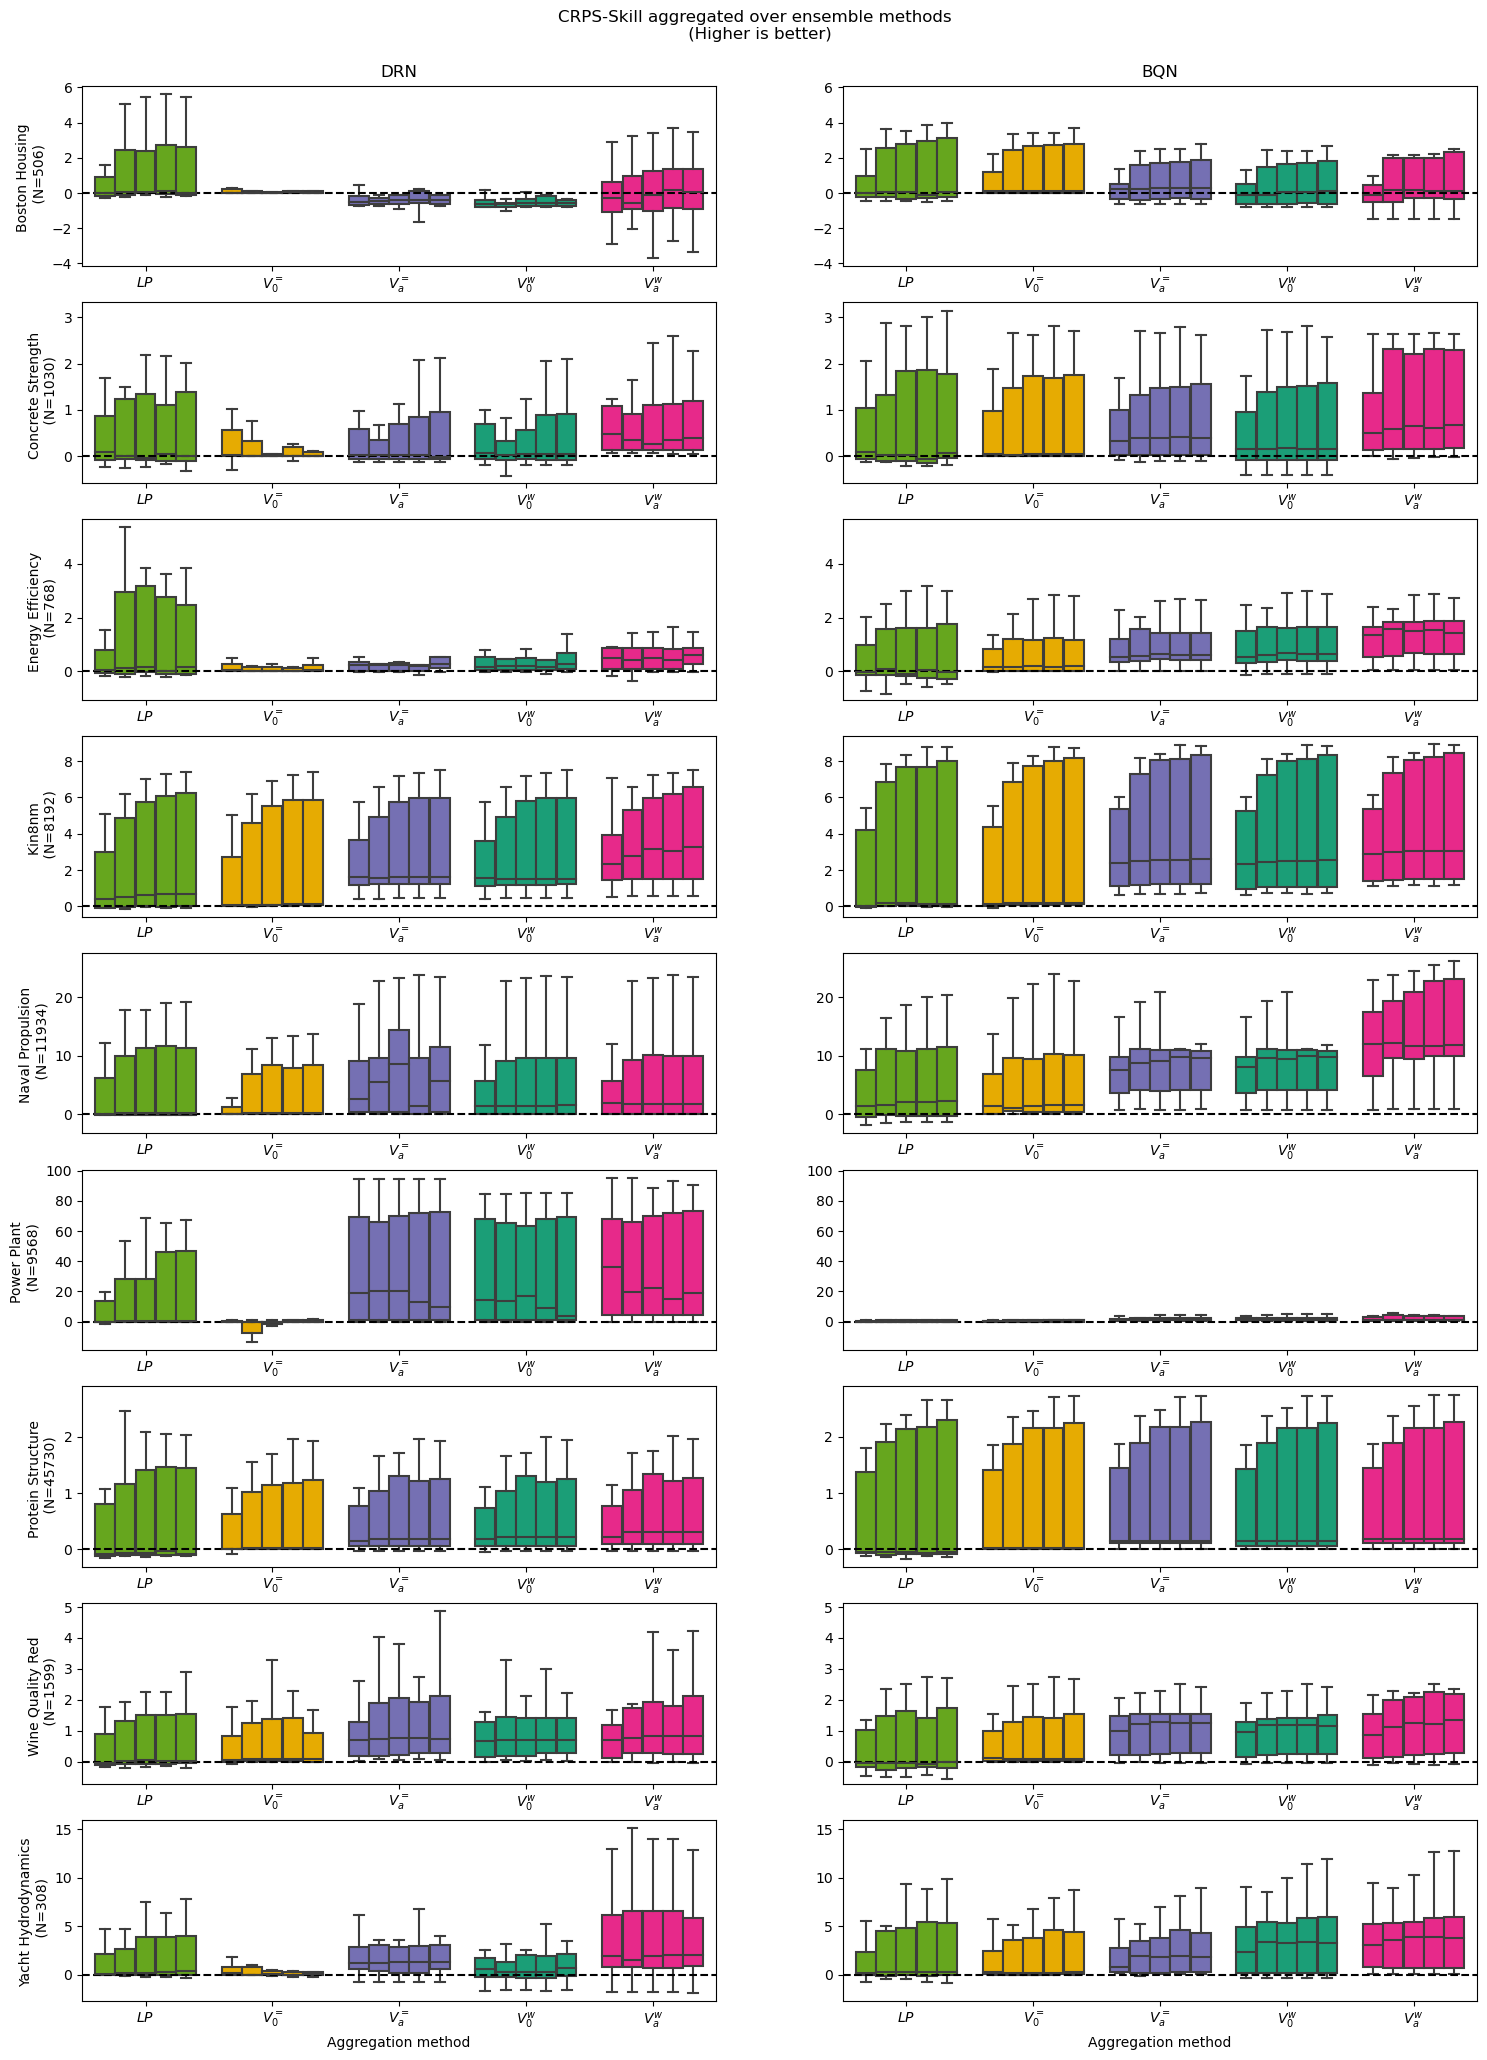

In [18]:
##### Skill - Boxplots - x=aggregation_methods #####

# Create subplots
fig, axs = plt.subplots(nrows=len(dataset_ls), ncols=len(nn_vec), figsize=(18,18*1.4), squeeze=False)

# Iterate over NN types and datasets
for i_nn, nn in enumerate(nn_vec):
    df_nn = df_skills[df_skills["nn"] == nn]
    for i_dataset, dataset in enumerate(dataset_ls):
        df_nn_dataset = df_nn[(df_nn["dataset"] == dataset)]
        # Melt dataframe for sns plots
        df_melt = pd.melt(df_nn_dataset, id_vars=["ens_method", "dataset", "nn", "agg"], var_name="ensemble_size", value_name="skill")
        # Only use skills not differences
        df_final = df_melt[df_melt["ensemble_size"].isin([f"skill_{n_ens}" for n_ens in n_ens_vec])]
        
        # Plot boxplots
        g = sns.boxplot(ax=axs[i_dataset][i_nn], data=df_final,
                 y="skill", x="agg", hue="ensemble_size", showfliers=show_outliers)
        
        # Add 0 line
        g.axhline(0, linestyle="--", color=kit_cols_dict["black"])
        # Add labels to x and y axis
        axs[i_dataset][i_nn].set_ylabel("")
        axs[i_dataset][0].set_ylabel(dataset_labels[dataset])
        axs[i_dataset][i_nn].set_xticklabels([agg_labels.get(agg) for agg in agg_meths])
        axs[i_dataset][i_nn].set_xlabel("")
        axs[len(dataset_ls)-1][i_nn].set_xlabel("Aggregation method")

        # Change color
        boxplots = axs[i_dataset][i_nn].patches
        agg_col_ls = list(agg_col.values())[:5]
        for i, boxplot in enumerate(boxplots[1:len(agg_col_ls)*2:2] + boxplots[len(agg_col_ls)*2:]):  # type: ignore
            boxplot.set_facecolor(agg_col_ls[i//5])

# # Remove subplot legends and add figure legend
for ax in [item for sublist in axs for item in sublist]:
    ax.legend([],[], frameon=False)
handles, labels = axs[0][0].get_legend_handles_labels()

# Set y axis range
for ax_drn, ax_bqn in axs:
    drn_l, drn_u = ax_drn.get_ylim()
    bqn_l, bqn_u = ax_bqn.get_ylim()
    drn_range = drn_u - drn_l
    bqn_range = bqn_u - bqn_l
    
    ax_drn.set_ylim(min(drn_l, bqn_l), max(drn_u, bqn_u))
    ax_bqn.set_ylim(min(drn_l, bqn_l), max(drn_u, bqn_u))

# Set titles and legends
axs[0][0].set_title("DRN")
axs[0][1].set_title("BQN")
fig.subplots_adjust(top=0.87)
fig.suptitle(f"CRPS-Skill aggregated over ensemble methods \n (Higher is better)", y=0.9)

# Save figure
# if export:
#     if show_outliers:
#         filename=os.path.join(save_dir, "01_skill_boxplot_per_agg.pdf")
#         fig.savefig(filename, bbox_inches='tight')
#         filename=os.path.join(save_dir, "01_skill_boxplot_per_agg.png")
#         fig.savefig(filename, bbox_inches='tight')
#     else:
#         filename=os.path.join(save_dir, "01_skill_boxplot_per_agg_no_outliers.pdf")
#         fig.savefig(filename, bbox_inches='tight')
#         filename=os.path.join(save_dir, "01_skill_boxplot_per_agg_no_outliers.png")
#         fig.savefig(filename, bbox_inches='tight')